# PyTorch Introduction
Pytorch is an open source machine learning library primarily developed by Meta AI (Facebook AI). Pytorch is a fairly mature project with a robust ecosystem and is now the base for many other deep learning libraries (fast.ai, Pytorch-Lightning, HuggingFace, etc). 

Pytorch provides user with high-level features for working with Tensors, a unit similar to Numpy ndarrays (syntactically and functionally), and various modules for building neural networks. This notebook will follow along with PyTorch's official [learn the basics](https://pytorch.org/tutorials/beginner/basics/intro.html) tutorial. They also have a nice [series](https://pytorch.org/tutorials/beginner/introyt.html) on youtube for getting started in PyTorch!

This notebook was created by Keaton Kraiger.

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

In [38]:
import torch 
import numpy as np

### Initializing a Tensor
Tensors can be initialzed multiple ways. Tensors can be created directly from data and the data type is automatically inferred.

In [39]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

**From a  Numpy array**

In [40]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor**

The new tensor retains the shape and datatype of the original tensor unless overridden.

In [41]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3542, 0.2898],
        [0.2637, 0.1087]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [42]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5459, 0.5973, 0.7951],
        [0.3473, 0.0790, 0.4475]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of Tensors
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [43]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors
By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory

In [44]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cpu")
    
# Notice the Numpy-like syntax
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension. You also have the ``torch.stack`` operation that is subtly different than `cat`

In [45]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t2 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)
print()
print(t2)
print(tensor.shape)
print(t1.shape)
print(t2.shape)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])
torch.Size([4, 4])
torch.Size([4, 12])
torch.Size([4, 3, 4])


**Arithmetic operations**

In [46]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T # @ when used in an expression envokes matrix multiplication since Python 3.5(?)
y2 = tensor.matmul(tensor.T)


y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:

In [47]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


**In-place operations**
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

Let's try some examples! Below we will be working with an image. First let's load the image from skimage and place it in `face`. 

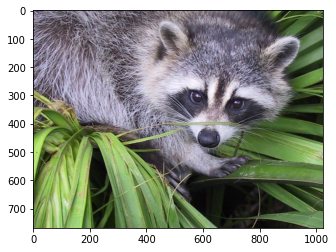

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from scipy import misc
import torch


#camera = data.camera()
face = misc.face()
plt.imshow(face)

The array containing our image is in the variable `face`, a numpy array with dtype `uint8`. Lets create a pytorch tensor from the numpy array.

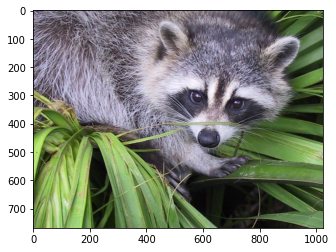

In [49]:
### START CODE HERE ### (≈ 1 lines of code)
face_tensor = torch.tensor(face)
### END CODE HERE ###

plt.imshow(face_tensor) # Note that matplotlib is able to plot the tensor.
assert face_tensor.shape == face.shape

Now let's make some modifications to the image. Use `face_tensor` and pytorch functions to create 
- `face_flipped`: image mirrored over the x dimension
- `invert_color`: image with colors inverted (we can obtain this by subtracting each pixels value from the maximum pixel value).
- `pink_color`: image with the green channel removed (set to 0). Note that our original image is RBG.
- `image_stack`: image with our newly created images (3 total) stacked on top of one another (order doesn't matter).

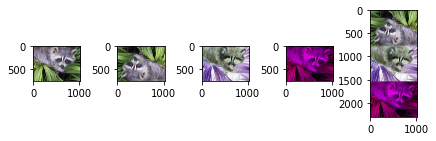

In [50]:
### START CODE HERE ### (≈ 1 lines of code)
face_flipped = face_tensor.rot90().rot90()
invert_color = 1-face_tensor
pink_color = face_tensor.clone()
pink_color[:,:,1]=0
image_stack = torch.concat([face_flipped,invert_color, pink_color ], dim=0)
### END CODE HERE ###
                         
fig, axs = plt.subplots(1,5)
fig.tight_layout()
axs[0].imshow(face_tensor.numpy())
axs[1].imshow(face_flipped.numpy())
axs[2].imshow(invert_color.numpy())
axs[3].imshow(pink_color.numpy())
axs[4].imshow(image_stack)

# Datasets and Dataloaders
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

In this example, we will be loading in the MNIST dataset, a pre-loaded dataset provided by pytorch in their `torch.utils.data.DataLoader`. The dataset will be loaded with the following paramters
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations.
 
\* **Note:**  This will physically download the dataset to ``root``. You can either delete the dataset after the excercise or change ``download``'s value. The dataset is ~126M.

In [51]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms as transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()])

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

## Iterating and Visualizing the Dataset

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.

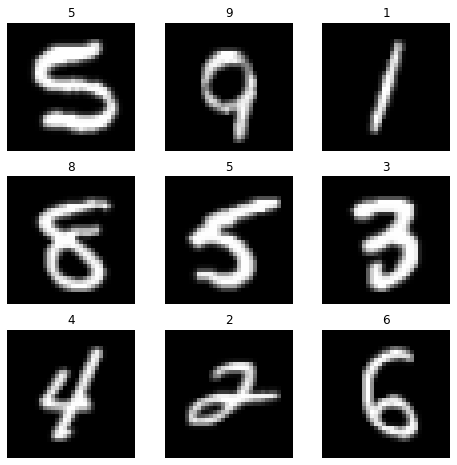

tensor([5, 0, 4,  ..., 5, 6, 8])

In [52]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

training_data.targets

## Creating a Custom Dataset for your files
A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the FashionMNIST images are stored
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``.

In the next sections, we'll break down what's happening in each of these functions.

In [53]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### \_\_init\_\_
The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered
in more detail in the next section).

The labels.csv file looks like: ::

    zero1.jpg, 0
    zero2.jpg, 0
    ......
    nine999.jpg, 9


In [54]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### \_\_len\_\_
The \_\_len\_\_ function returns the number of samples in our dataset.

In [55]:
# For example
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### \_\_getitem\_\_
The \_\_getitem\_\_ function loads and returns a sample from the dataset at the given index ``idx``.
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the
tensor image and corresponding label in a tuple.

In [56]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

## Preparing your data for training with DataLoaders
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.

In [57]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader
We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over
the data loading order

Feature batch shape: torch.Size([64, 1, 32, 32])
Labels batch shape: torch.Size([64])


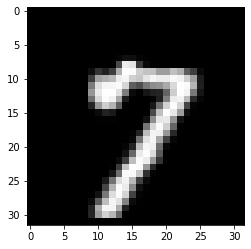

Label: 7


In [58]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label.item()}")

**Note**: from here we will not be including all content from the Pytorch's tutorial, but we encourage you to look at it.

# Building Models
Neural networks comprise of layers/modules that perform operations on data.
The [`torch.nn`](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to
build your own neural network. Every module in PyTorch subclasses the [`nn.Module`](<https://pytorch.org/docs/stable/generated/torch.nn.Module.html>).
A neural network is a module itself that consists of other modules (layers). This nested structure allows for
building and managing complex architectures easily.

## Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU,
if it is available. Let's check to see if
[`torch.cuda`](https://pytorch.org/docs/stable/notes/cuda.html) is available, else we
continue to use the CPU.

In [59]:
import torch.nn as nn
device = 'cpu' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


## Define the Class
We define our neural network by subclassing ``nn.Module``, and
initialize the neural network layers in ``__init__``. Every ``nn.Module`` subclass implements
the operations on input data in the ``forward`` method.

We create an instance of ``NeuralNetwork``, and move it to the ``device``, and print its structure.

In [60]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model's ``forward``,
along with some background operations.
Do not call ``model.forward()`` directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class.
We get the prediction probabilities by passing it through an instance of the ``nn.Softmax`` module.

In [61]:
E = torch.rand(1, 32, 32, device=device)
logits = model(E)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


# Autograd
When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine
called ``torch.autograd``. It supports automatic computation of gradient for any
computational graph.

Consider the simplest one-layer neural network, with input ``x``,
parameters ``w`` and ``b``, and some loss function. It can be defined in
PyTorch in the following manner:

In [62]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### Tensors, Functions and Computational graph
This code defines the following **computational graph**:
![NN.png](attachment:NN.png)

In this network, ``w`` and ``b`` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the ``requires_grad`` property of those tensors.

**Note**: You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_(True)` method.

A function that we apply to tensors to construct computational graph is
in fact an object of class ``Function``. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in ``grad_fn`` property of a
tensor.

In [63]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f5fb5d9e550>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f5fb5e5e7c0>


## Computing Gradients
To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
``x`` and ``y``. To compute those derivatives, we call
``loss.backward()``, and then retrieve the values from ``w.grad`` and
``b.grad``:

In [64]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3142, 0.3248, 0.0711],
        [0.3142, 0.3248, 0.0711],
        [0.3142, 0.3248, 0.0711],
        [0.3142, 0.3248, 0.0711],
        [0.3142, 0.3248, 0.0711]])
tensor([0.3142, 0.3248, 0.0711])


## Disabling Gradient Tracking
By default, all tensors with ``requires_grad=True`` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
``torch.no_grad()`` block:

In [65]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

# Similarily, we can use tensor.detach() to set requires_grad=False
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


We've created the tensor `t` with a random *grayscale* image and want to pass it through our `model`. Like before
- pass `t` through `model` and store the result in `logits`
- apply the `softmin` function to `logits` along the 1st dim and store the result in `prob`
- get `prob`'s minimum and store the result in `pred`.

We may also want to view the image `t` but no longer want to track its gradient
- create a new image (tensor) named `t_det` which contains the image `t` but has its `requires_grad` set to False
- ensure we can plot `t_det` with matplotlib.

Of course here `t`'s gradient is None since we have not called `backward()` on a graph containing `t`. 

tensor([[0.1054, 0.1087, 0.0934, 0.1019, 0.0995, 0.1013, 0.0968, 0.0958, 0.0975,
         0.0999]], grad_fn=<SoftmaxBackward0>)


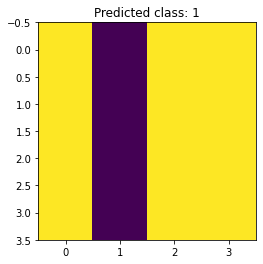

In [66]:
t = torch.rand(1, 32, 32, device=device, requires_grad=True)


### START CODE HERE ### (≈ 5 lines of code)
logits = model(t)
prob = nn.Softmin(dim=1)(logits)
pred = prob.argmax(1)
t_det = t.detach()
t_det.requires_grad=False
t_det=tensor.to("cpu")
### END CODE HERE ###

plt.imshow(t_det)
plt.title(f"Predicted class: {pred.item()}") #notice we're expecting pred to be a tensor.
assert t_det.requires_grad == False
assert t.requires_grad == True
print(prob)

You may want to disable grad tracking
- To mark some parameters in your neural network as **frozen parameters**, a common technique of finetuning a pretrained model.
- To **speed up computations** when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

The section of Pytorch's tutorial which covers freezing a network's parameters is worth reading.

# Optimizing Model Parameters
Once we have a network and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an *epoch*) the model makes a guess about the output, calculates
the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters and **optimizes** these parameters using gradient descent.

## Hyperparameters
Hyperparameters are adjustable parameters that let you control the model optimization process.
Different hyperparameter values can impact model training and convergence rates. We define the following hyperparameters for training:
 - **Number of Epochs** - the number times to iterate over the dataset
 - **Batch Size** - the number of data samples propagated through the network before the parameters are updated
 - **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [67]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each
iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to
see the `full-impl-label` of the optimization loop.

## Loss Function
**Loss function** measures the degree of dissimilarity of obtained result to the target value,
and it is the loss function that we want to minimize during training. To calculate the loss we make a
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and
[`nn.NLLLoss`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification.
[`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines ``nn.LogSoftmax`` and ``nn.NLLLoss``.

We pass our model's output logits to ``nn.CrossEntropyLoss``, which will normalize the logits and compute the prediction error.

In [68]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

## Optimizer
Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in  the ``optimizer`` object.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

In [69]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Full Implementation - Train Loop
We define `train_loop` that loops over our optimization code

In [70]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Full Implementation - Train Loop
`test_loop` evaluates the model’s performance against our test data.

In [71]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \nAccuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model's improving performance.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

assert epochs != 1, print("either there is an error in the code or epochs=1.")
print("Done!")

Epoch 1
-------------------------------
loss: 2.311354  [    0/60000]
loss: 2.287534  [ 6400/60000]
loss: 2.293365  [12800/60000]
loss: 2.292485  [19200/60000]
loss: 2.285778  [25600/60000]
loss: 2.289114  [32000/60000]
loss: 2.279624  [38400/60000]
loss: 2.269099  [44800/60000]
loss: 2.254558  [51200/60000]
loss: 2.255889  [57600/60000]
Test Error: 
Accuracy: 33.9%, Avg loss: 2.255797 

Epoch 2
-------------------------------
loss: 2.246609  [    0/60000]
loss: 2.265809  [ 6400/60000]
loss: 2.252275  [12800/60000]
loss: 2.239961  [19200/60000]
loss: 2.232861  [25600/60000]


If the above cell does not run and gives an error then we have a bug somewhere in the code. Given the RuntimeError, look back at the code to correct the mistake and rerun the training cell. 

**Note**: when you locate and fix the error, make sure to rerun and correct any relevant cells that need to be updated. You don't need to rerun the entire notebook. 